In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

## Salary Predictions from Years of Experience

In [2]:
# loading dataset
sal_df = pd.read_csv("Salary_Data.csv")

In [3]:
sal_df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


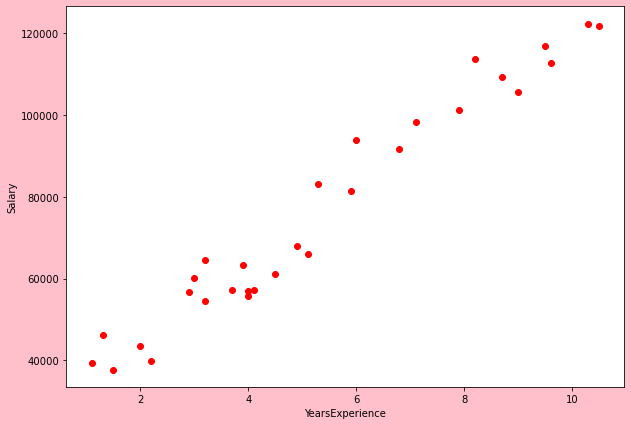

In [6]:
# plotting the correlation between the feature and target variable
plt.figure(figsize= (10,7), facecolor ="pink")
plt.scatter(sal_df.YearsExperience, sal_df.Salary, color= "red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

#### Creating the model:

In [7]:
my_model= smf.ols('Salary~YearsExperience', data = sal_df).fit()

In [8]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        14:01:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here we see that the pvalue of the independent variable is 0, and rsqr value of the model is 96%. 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()

In [11]:
X = sal_df['YearsExperience'].values.reshape(-1,1)
Y = sal_df['Salary'].values.reshape(-1,1)

In [12]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [13]:
reg.fit(X,Y)

LinearRegression()

In [14]:
y_hat_Sal = reg.predict(X)

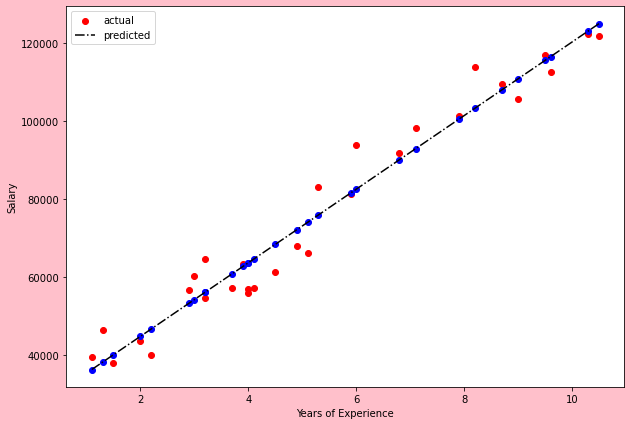

In [15]:
plt.figure(figsize= (10,7), facecolor ="pink")
plt.scatter(sal_df.YearsExperience, sal_df.Salary, color= "red", label= "actual")

# plotting the y_hat best fit line to the plot
plt.plot(sal_df.YearsExperience, y_hat_Sal, color= "black", linestyle="-.", label ="predicted")
plt.scatter(sal_df['YearsExperience'], y_hat_Sal, color= "blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(loc = "best")
plt.show()

## <center> ===================== Accuracy:95% ========================

## Predictions of Delivery time using Sorting time

In [16]:
del_df = pd.read_csv("delivery_time.csv")

In [17]:
del_df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [18]:
del_df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


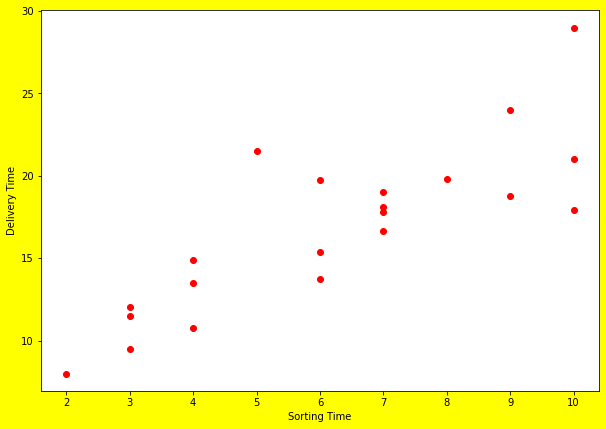

In [19]:
plt.figure(figsize= (10,7), facecolor= "yellow")
plt.scatter(del_df['Sorting Time'], del_df['Delivery Time'], color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [20]:
S= del_df['Sorting Time'].values.reshape(-1,1)
D = del_df['Delivery Time'].values.reshape(-1,1)

In [21]:
reg.fit(S,D)

LinearRegression()

In [22]:
y_hat_Del = reg.predict(S)

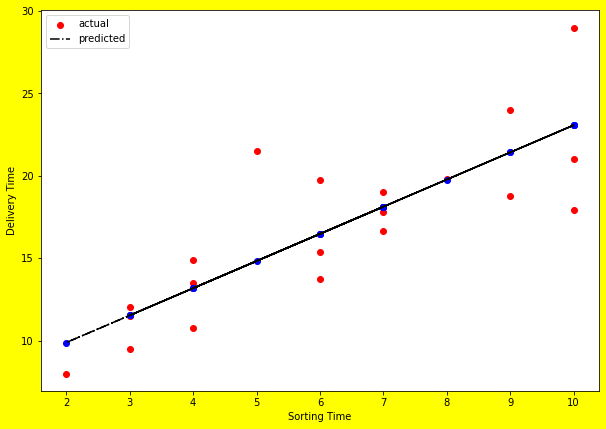

In [23]:
plt.figure(figsize= (10,7), facecolor= "yellow")
plt.scatter(del_df['Sorting Time'], del_df['Delivery Time'], color="red", label="actual")
plt.plot(del_df['Sorting Time'], y_hat_Del, color = "black", linestyle="-.", label = "predicted")
plt.scatter(del_df['Sorting Time'], y_hat_Del, color = "blue")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc = "best")
plt.show()

In [24]:
del_df.rename(columns= {'Sorting Time': 'SortTime'}, inplace = True)
del_df.rename(columns= {'Delivery Time': 'DelTime'}, inplace = True)

In [25]:
del_df.head(5)

,DelTime,SortTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [64]:
first_model = smf.ols('(DelTime)~(SortTime)', data = del_df).fit()

In [65]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DelTime   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.54
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           6.61e-05
Time:                        14:39:50   Log-Likelihood:                -42.608
No. Observations:                  18   AIC:                             89.22
Df Residuals:                      16   BIC:                             91.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3845      1.730      4.269      0.001       3.717      11.052
SortTime       1.4840      0.278      5.342      0.000       0.895       2.073
==============================================================================
Omnibus:                        3.715   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                1.878
Skew:                           0.752   Prob(JB):                        0.391
Kurtosis:                       3.489   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
influence = first_model.get_influence()
(c, _) = influence.cooks_distance

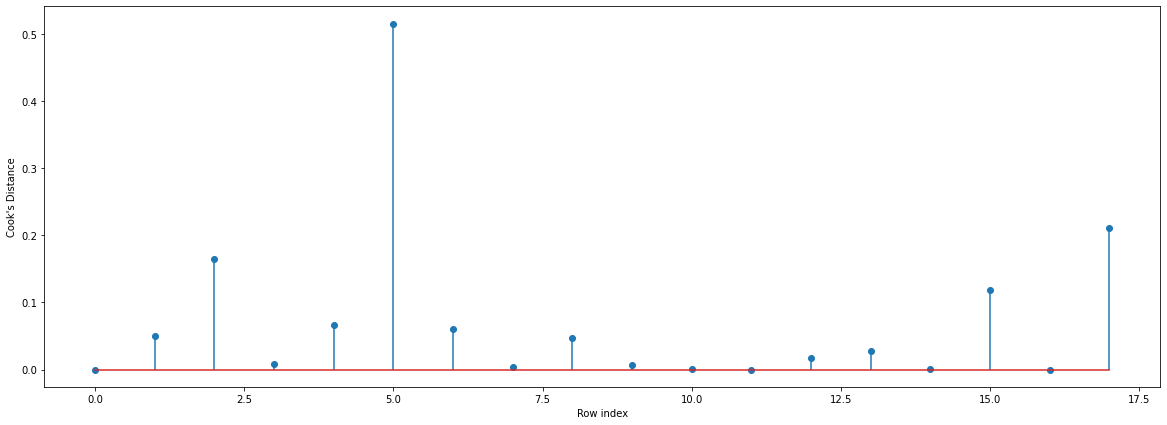

In [67]:
fig = plt.figure(figsize= (20,7))
plt.stem(np.arange(len(del_df)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [69]:
(np.argmax(c), np.max(c))

(5, 0.5154576863206671)

In [70]:
del_df.head(5)

,DelTime,SortTime
0,13.50,4
1,19.75,6
2,24.00,9
3,19.00,7
4,9.50,3


In [79]:
del_df = del_df.drop(del_df.index[[3,5,16]],axis = 0).reset_index()

In [83]:
del_df = del_df.drop(columns=['index','level_0'])

In [84]:
del_df

,DelTime,SortTime
0,13.50,4
1,19.75,6
2,24.00,9
3,9.50,3
4,19.83,8
5,10.75,4
6,16.68,7
7,11.50,3
8,12.03,3
9,14.88,4


In [85]:
final_model = smf.ols('(DelTime)~(SortTime)', data = del_df).fit()

In [86]:
import warnings 
warnings.filterwarnings('ignore')
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                DelTime   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     71.79
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           2.08e-06
Time:                        14:43:23   Log-Likelihood:                -26.967
No. Observations:                  14   AIC:                             57.93
Df Residuals:                      12   BIC:                             59.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9721      1.278      3.891      0.002       2.188       7.756
SortTime       1.9247      0.227      8.473      0.000       1.430       2.420
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.554
Skew:                           0.246   Prob(JB):                        0.758
Kurtosis:                       2.159   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# reshaping the columns to plot the model
x = del_df['DelTime'].values.reshape(-1,1)
y = del_df['SortTime'].values.reshape(-1,1)

In [91]:
reg.fit(x,y)

LinearRegression()

In [92]:
y_hat_Del = reg.predict(x)

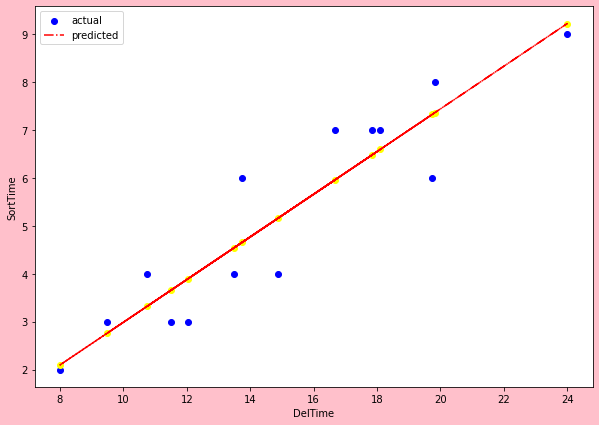

In [93]:
plt.figure(figsize= (10,7), facecolor ="pink")
plt.scatter(del_df.DelTime, del_df.SortTime, color= "blue", label= "actual")

# plotting the y_hat best fit line to the plot
plt.plot(del_df.DelTime, y_hat_Del, color= "red", linestyle="-.", label ="predicted")
plt.scatter(del_df['DelTime'], y_hat_Del, color= "yellow")
plt.xlabel("DelTime")
plt.ylabel("SortTime")
plt.legend(loc = "best")
plt.show()

# <center> ===================== Accuracy:86% =========================